# Project 2: "WeRateDogs" Data Wrangling #

## 1. Gathering Data: ##

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re

import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#read archive data from .csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [86]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [94]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

os.listdir

<function nt.listdir(path=None)>

In [3]:
#read image predictions data from downloaded tsv file
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [154]:
image_predictions_df


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
# code to set api object that will be use tweepy to collect further tweets data progrmatically
# as instructed, the keys have been replaced with characters..

consumer_key = '************'
consumer_secret = '************'
access_token = '************'
access_secret = '************''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


###### _Below line of codes just for exploring contents of tweets for better undertanding of _json structure_

In [10]:
api

In [13]:
exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content)


{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [14]:
content.keys()


dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [15]:
exp_tweet.retweet_count

2063

In [16]:
exp_tweet.id

747963614829678593

In [17]:
exp_tweet.favorite_count

5596

In [18]:
content['user']['followers_count']

8963371

In [ ]:
# download additional data using tweeter API
errors_list=[]

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', mode='w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                twt_status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(twt_status._json, file)
                file.write('\n')
            except Exception as e:
                print("Ops..Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors_list.append(tweet_id)
                
                


In [4]:
df_list=[]
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_data = json.loads(line)
        df_list.append(tweet_data)
        
api_df = pd.DataFrame(df_list)

api_df = api_df[['id','retweet_count','favorite_count']]

api_df

,id,retweet_count,favorite_count
0,892420643555336193,7380,35082
1,892177421306343426,5498,30371
2,891815181378084864,3633,22834
3,891689557279858688,7559,38354
4,891327558926688256,8143,36637
...,...,...,...
2323,666049248165822465,38,94
2324,666044226329800704,122,260
2325,666033412701032449,39,107
2326,666029285002620928,41,118


## 2. Assessing Data: ##

### 2.1 Visual Assessment ###

- Exploring the 3 gathered raw dataframes: **_archive_df_*, _image_predictions_df_*, _api_df_**

In [66]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [67]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241...,10,10,None,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,783214.0,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you see sophomores in high school driving...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256...,11,10,None,None,None,None,None


### Quality Issues in _archive_df_ ###

#### Consistency issues ####

1) The "None" values under "doggo", "floofer", "pupper" and "puppo" columns.

#### Accuracy Issues ####

2) Some outlier values from 0 to 170 for "rating_denominator" column are excceding 10 which is the scale of evaluation.

### Tidiness Issues in _archive_df_ ###

A) In _archive_df_ the 4 columns of: doggo,floofer,pupper, puppo are represting variable values not names, should be replaced by a single column called "dog_stage" column.


In [99]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Tidiness Issues in image_predictions_df ###

B) In _image_predictions_df_ The 3 columns of p1,p2,p3 are representing prediction algorithms, should be replaced by "prediction_algo" column.

In [100]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,7380,35082
1,892177421306343426,5498,30371
2,891815181378084864,3633,22834
3,891689557279858688,7559,38354
4,891327558926688256,8143,36637
...,...,...,...
2323,666049248165822465,38,94
2324,666044226329800704,122,260
2325,666033412701032449,39,107
2326,666029285002620928,41,118


### Tidiness Issues in _api_df_ ###

C) The _api_df_ can be merged with archive_df as one observation table on dogs' tweet. (A single observational unit is stored in multiple tables)

###  2.2 Programmatic Assessment ###

In [43]:
archive_df.info()
archive_df.head()
archive_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
595,798701998996647937,NaN,NaN,2016-11-16 01:39:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We normally don't rate marshmal...,7.186315e+17,4.196984e+09,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,None,None,None,None
2252,667801013445750784,NaN,NaN,2015-11-20 20:25:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10 https://t.co/SVMF4Frf1w,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667801013...,12,10,None,None,None,None,None


In [68]:
archive_df.retweeted_status_id.value_counts()

6.816941e+17    1
8.688804e+17    1
8.071068e+17    1
8.099208e+17    1
7.932865e+17    1
               ..
7.902771e+17    1
6.671522e+17    1
7.638376e+17    1
8.083449e+17    1
6.675487e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

### Quality Issues in _archive_df_ ###
#### Consistency issues ####

 3) tweet_id is int type should be converted to str
 
 4) timestamp is object type

#### Validty Issues ####

5) tweets in archive_df without corresponding entry in image_prediction_df is a tweet without image, so another validity issue.

6) 181 row "retweeted" entries need to be cleanded as required in the project only **original tweets with images**

In [26]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Additional 2 Quality Issues in _image_predictions_df_ ####

7) tweet_id type is int type, need to change it to str.

8) Total no. of enries are 2075 < archive_df entries 2356 indicates that some entires are with no images (validity issue)

In [40]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,7380,35082
1,892177421306343426,5498,30371
2,891815181378084864,3633,22834
3,891689557279858688,7559,38354
4,891327558926688256,8143,36637
...,...,...,...
2323,666049248165822465,38,94
2324,666044226329800704,122,260
2325,666033412701032449,39,107
2326,666029285002620928,41,118


In [33]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Additional Quality Issue in _api_df_ ####

9) id column type is int type, need to change it to str.

10) Remove tweets in api_df that has no corresponding tweet_id in archive

### _Quality Issues Summary:_ ###

1) The "None" values under "doggo", "floofer", "pupper" and "puppo" columns should be NAN.

2) Some outlier values from 0 to 170 for **"rating_denominator"** column are excceding 10 which is the scale of evaluation.

3) tweet_id is int type should be converted to str using astype method.
 
4) timestamp is object type using astype method.

5) tweets in archive_df without corresponding entry in image_prediction_df is a tweet without image.

6) 181 row "retweeted" entries need to be cleanded as required in the project only **original tweets with images**

7) tweet_id type is int type, need to change it to str using astype method.

8) Total no. of enries are 2075 < archive_df entries 2356 indicates that some entires are with no images (validity issue).

9) In api_df "id" column's type is int type, need to change it to str.

10) Remove tweets "id" in api_df that has no corresponding tweet_id in archive.

### _Tidiness Issues  Summary:_ ###

A) In _archive_df_ the 4 columns of: doggo,floofer,pupper, puppo are represting variable values not names, should be replaced by a single column called "dog_stage" column

B) In _image_predictions_df_ The 3 columns of p1,p2,p3 are representing prediction algorithms, should be replaced by 1 column

C) The _api_df_ can be merged with archive_df as one observation table on dogs' tweet. (A single observational unit is stored in multiple tables)

## 3. Cleaning Data: ##

- Copying the data into new dataframes before conducting any cleaning actions

In [5]:
archive_df_clean= archive_df.copy()
image_predictions_df_clean= image_predictions_df.copy()
api_df_clean= api_df.copy()

In [135]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [91]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


##### Define
- In _"archive_df"_ and _"image_preditions_df"_ tweet_id coulmn type is int type, covert it to str using astype method.
- In _"archive_df"_ timestamp is object type, using astype method to convert it to date and time.
- In _"api_df"_ id column type is int, converting to str using astype method.

##### Code

In [6]:
archive_df_clean.tweet_id=archive_df_clean.tweet_id.astype(str)
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.astype(str)
api_df_clean.id= api_df_clean.id.astype(str)

archive_df_clean.timestamp= pd.to_datetime(archive_df_clean.timestamp)

##### Test

In [7]:
archive_df_clean.info()
print('#'*60)
image_predictions_df_clean.info()
print('#'*60)
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [98]:
archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Define

- In _"archive_df"_ replace the "None" values under doggo, floffer, puppo columns to empty values.>> later we fix this tidiness issue and replace empty values by NaN.

##### Code

In [8]:
archive_df_clean.iloc[:, -4: ] = archive_df_clean.iloc [:, -4: ].replace('None','')

##### Test

In [140]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### Define

- tweets in archive_df without corresponding entry in image_prediction_df is a tweet without image, so another validity issue.

 ##### Code

In [9]:
tweets_with_images = list(image_predictions_df_clean.tweet_id.unique())

len(tweets_with_images) == archive_df_clean.tweet_id.isin(tweets_with_images).sum()

archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_images)]


##### Test

In [109]:
archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


###### Define
- 181 row "retweeted" and "reply" entries need to be cleanded -> validity issue

##### code

In [10]:
retweet_entries = archive_df_clean.retweeted_status_id.notnull()

archive_df_clean = archive_df_clean [~ retweet_entries] 

reply_etnries = archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean = archive_df_clean [~ reply_etnries]


##### Test

In [111]:
archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
archive_df_clean = archive_df_clean.drop('in_reply_to_status_id',axis=1)
archive_df_clean = archive_df_clean.drop('in_reply_to_user_id',axis=1)
archive_df_clean = archive_df_clean.drop('retweeted_status_id',axis=1)
archive_df_clean = archive_df_clean.drop('retweeted_status_user_id',axis=1)
archive_df_clean = archive_df_clean.drop('retweeted_status_timestamp',axis=1)


##### Define
- remove tweets in _"image_predictions_df"_ that has no corresponding tweets in _"archive_df"_

##### Code

In [12]:
np.logical_not(image_predictions_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))

image_predictions_df_clean= image_predictions_df_clean[~ np.logical_not(image_predictions_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

##### Test

In [114]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Define
    - Some outlier values in _"archive_df"_ are != 10 in "rating_denominator" column, using query and replace functions to fix this issue

- Code

In [13]:
archive_df_clean.rating_denominator = archive_df_clean.rating_denominator = 10


##### Test

In [115]:
archive_df_clean


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [277]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [278]:
api_df_clean

,id,retweet_count,favorite_count
0,892420643555336193,7380,35082
1,892177421306343426,5498,30371
2,891815181378084864,3633,22834
3,891689557279858688,7559,38354
4,891327558926688256,8143,36637
...,...,...,...
2323,666049248165822465,38,94
2324,666044226329800704,122,260
2325,666033412701032449,39,107
2326,666029285002620928,41,118


##### Define
- Tidiness issue of dog classifications, the doggo, floofer, pupper, puppo are variables not identifiers, a new "dog_class" column will be added to the dataframe to express the dog stage/classification..

##### code

In [14]:
archive_df_clean ['dog_class'] = archive_df_clean ['doggo'] + archive_df_clean['floofer']+archive_df_clean ['pupper'] + archive_df_clean['puppo']

archive_df_clean = archive_df_clean.drop('doggo',axis=1)
archive_df_clean = archive_df_clean.drop('floofer',axis=1)
archive_df_clean = archive_df_clean.drop('pupper',axis=1)
archive_df_clean = archive_df_clean.drop('puppo',axis=1)

# codes handling the mulitple dog_class..
archive_df_clean.loc[archive_df_clean.dog_class == 'doggopupper','dog_class'] = 'doggo,pupper'
archive_df_clean.loc[archive_df_clean.dog_class == 'doggofloofer','dog_class'] = 'doggo,floofer'
archive_df_clean.loc[archive_df_clean.dog_class == 'doggopuppo','dog_class'] = 'doggo,puppo'

#replace any empty value in dog_class to NAN using np.nan
archive_df_clean.dog_class.replace('',np.nan, inplace=True)


##### Test

In [151]:

archive_df_clean.info()
archive_df_clean.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_class           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 154.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
717,783695101801398276,2016-10-05 15:47:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,NaN
162,860524505164394496,2017-05-05 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,NaN
931,754120377874386944,2016-07-16 01:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you hear your owner say they need to hatc...,https://twitter.com/dog_rates/status/754120377...,10,10,None,NaN
345,831939777352105988,2017-02-15 18:54:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo
1720,680145970311643136,2015-12-24 22:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,pupper
977,750011400160841729,2016-07-04 17:00:26+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo
1982,672968025906282496,2015-12-05 02:37:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,NaN
2082,670815497391357952,2015-11-29 04:04:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,NaN
17,888804989199671297,2017-07-22 16:56:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,NaN
1777,677918531514703872,2015-12-18 18:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",https://twitter.com/dog_rates/status/677918531...,10,10,None,NaN


##### Define

- fixing the tidiness issue in "image_predictions_df" by setting all predictions columns under onw column called "prediction_algo".


##### Code

In [15]:
image_predictions_df_clean = pd.melt(image_predictions_df_clean, id_vars=['tweet_id','jpg_url','img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],var_name='prediction_algo')

##### Test

In [121]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,prediction_algo,value
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,True,0.156665,True,0.061428,True,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,p1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,p1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,True,0.243682,True,0.154629,True,p1,miniature_pinscher
...,...,...,...,...,...,...,...,...,...,...,...
5908,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,True,0.225770,True,0.175219,True,p3,German_short-haired_pointer
5909,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.170278,False,0.168086,True,0.040836,False,p3,spatula
5910,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,True,0.078253,True,0.031379,True,p3,kelpie
5911,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,True,0.090647,True,0.068957,True,p3,papillon


In [123]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


##### Define

- Remove tweets in api_df that has no corresponding tweet_id in archive

##### Code

In [16]:
#np.logical_not(image_predictions_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))

#image_predictions_df_clean= image_predictions_df_clean[~ np.logical_not(image_predictions_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

np.logical_not(api_df_clean.id.isin (list(archive_df_clean.tweet_id)))

api_df_clean = api_df_clean [~ np.logical_not(api_df_clean.id.isin (list(archive_df_clean.tweet_id)))]


##### Test

In [125]:
api_df_clean

,id,retweet_count,favorite_count
0,892420643555336193,7380,35082
1,892177421306343426,5498,30371
2,891815181378084864,3633,22834
3,891689557279858688,7559,38354
4,891327558926688256,8143,36637
...,...,...,...
2323,666049248165822465,38,94
2324,666044226329800704,122,260
2325,666033412701032449,39,107
2326,666029285002620928,41,118


In [63]:
archive_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,


##### Define

- Merge api_df with archive_df as both tables are same observatio which represent data about dog's tweets.

##### Code

In [17]:

archive_df_clean = pd.merge(archive_df_clean,api_df_clean, left_on='tweet_id', right_on='id', how='left')

# after merge, dropping the 'id' column as it's already exist in "tweet_id"
archive_df_clean = archive_df_clean.drop('id', axis=1)

##### Test

In [127]:

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_class           0 non-null      object             
 9   retweet_count       1961 non-null   float64            
 10  favorite_count      1961 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 184.8+ KB


In [155]:
archive_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7380.0,35082.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5498.0,30371.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3633.0,22834.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7559.0,38354.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8143.0,36637.0
...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,38.0,94.0
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,122.0,260.0
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,39.0,107.0
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,41.0,118.0


In [158]:
archive_df_clean.info()
api_df_clean.info()
archive_df_clean.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_class           303 non-null    object             
 9   retweet_count       1961 non-null   float64            
 10  favorite_count      1961 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 184.8+ KB
<class 'pand

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count
1660,671561002136281088,2015-12-01 05:26:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,10,the,NaN,6651.0,11916.0
590,770787852854652928,2016-08-31 00:58:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,NaN,1167.0,4818.0
200,842163532590374912,2017-03-16 00:00:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,https://twitter.com/dog_rates/status/842163532...,12,10,George,NaN,5518.0,23610.0
1662,671544874165002241,2015-12-01 04:22:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,https://twitter.com/dog_rates/status/671544874...,6,10,None,NaN,956.0,1826.0
352,815639385530101762,2017-01-01 19:22:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,NaN,1610.0,8098.0
137,858471635011153920,2017-04-30 00:02:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,NaN,4472.0,20211.0
1415,678278586130948096,2015-12-19 18:19:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,https://twitter.com/dog_rates/status/678278586...,10,10,None,pupper,5776.0,10910.0
1304,683462770029932544,2016-01-03 01:39:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",https://twitter.com/dog_rates/status/683462770...,8,10,None,pupper,645.0,2336.0
876,724405726123311104,2016-04-25 01:12:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,pupper,1590.0,5084.0
1840,668466899341221888,2015-11-22 16:31:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a mother dog caring for her pups. Snaz...,https://twitter.com/dog_rates/status/668466899...,4,10,a,NaN,465.0,817.0


## 4. Storing cleaned Data to CSV files ##

In [18]:
archive_df_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')
image_predictions_df_clean.to_csv('image_prediction_cleaned_master.csv',index=False, encoding= 'utf-8')

## 5. Visulatization ##

In [19]:
# copying the archarchive_df_clean to master df for plotting and visualization..
master_df = archive_df_clean.copy()

In [20]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_class           303 non-null    object             
 9   retweet_count       1961 non-null   float64            
 10  favorite_count      1961 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 184.8+ KB


<ipython-input-21-8c88af353b68>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  master_df.groupby('dog_class')['retweet_count','favorite_count'].mean().plot(kind='bar',figsize=(12,8),title = 'Avg retweet/favorite counts');


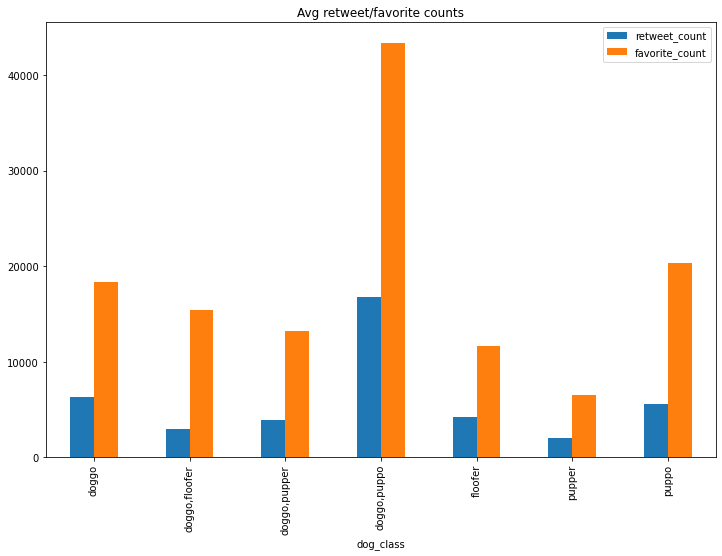

In [21]:

#df = master_df

#df['dog_class'].replace('', np.nan, inplace= True)

master_df.groupby('dog_class')['retweet_count','favorite_count'].mean().plot(kind='bar',figsize=(12,8),title = 'Avg retweet/favorite counts');




In [22]:
# df_t is an example name for a dataframe you can use to perform timeseries analysis
df_t = master_df.copy()

In [23]:
df_t.index = df_t['timestamp']
df_t.drop('timestamp',axis=1,inplace=True)
df_t.sort_index(inplace=True)


In [24]:
data_to_plot = df_t.groupby([(df_t.index.year),(df_t.index.month)])['retweet_count','favorite_count'].mean()

<ipython-input-24-a38180abd6c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_to_plot = df_t.groupby([(df_t.index.year),(df_t.index.month)])['retweet_count','favorite_count'].mean()


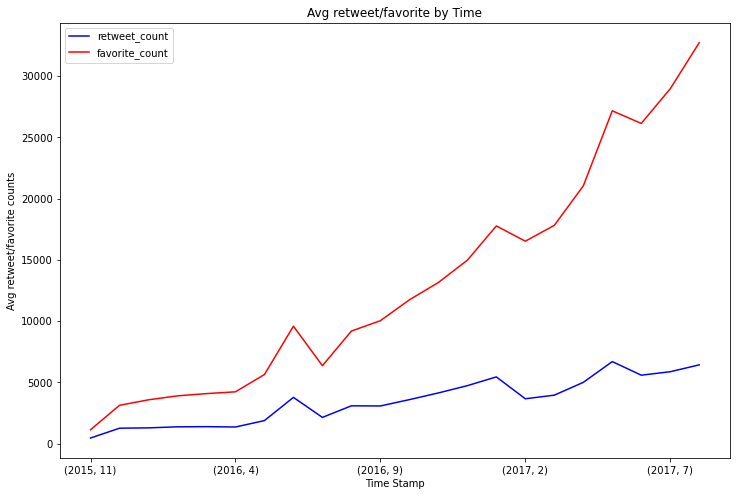

In [25]:
#data_to_plot.plot(style='-ro',figsize=(12,8),label='Total average rating')

data_to_plot.plot(color = ['b', 'r'],figsize=(12,8))

#plt.axhline(y=10.0, color= ['r','b'], linestyle='--', label='Out of rating')

plt.xlabel ('Time Stamp')
plt.ylabel ('Avg retweet/favorite counts')
plt.title ('Avg retweet/favorite by Time')
plt.colorbar = ['r','b']

<AxesSubplot:xlabel='dog_class'>

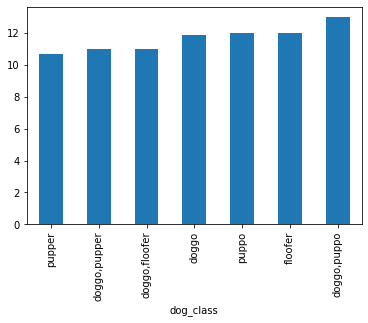

In [26]:
master_df.groupby(['dog_class']).rating_numerator.mean().sort_values(ascending=False)[12::-1].plot(kind='bar')


kind='bar',figsize=(12,8),title = 'Avg retweet/favorite counts');


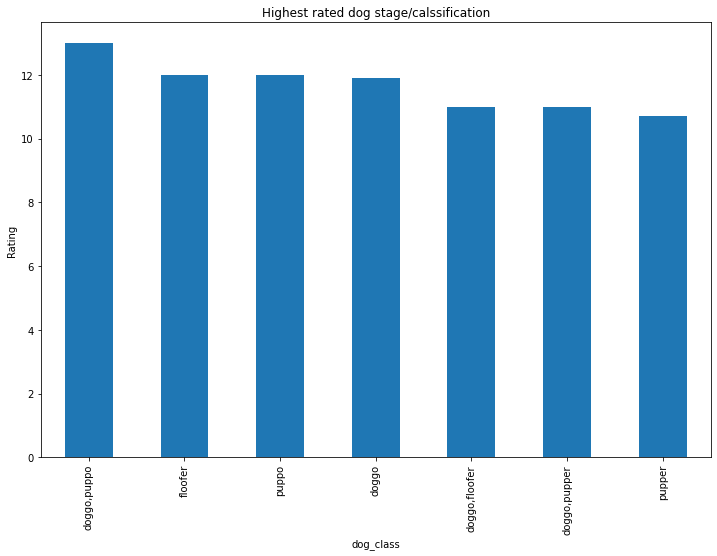

In [38]:
master_df.groupby(['dog_class']).rating_numerator.mean().sort_values(ascending=False).plot(kind='bar',figsize=(12,8),title = 'Highest rated dog stage/calssification',ylabel = 'Rating');